In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.shape

(545, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
df['mainroad'].unique()
df['guestroom'].unique()
df['basement'].unique()
df['hotwaterheating'].unique()
df['airconditioning'].unique()
df['prefarea'].unique()


array(['yes', 'no'], dtype=object)

In [8]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    int64 
 7   basement          545 non-null    int64 
 8   hotwaterheating   545 non-null    int64 
 9   airconditioning   545 non-null    int64 
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    int64 
 12  furnishingstatus  545 non-null    object
dtypes: int64(12), object(1)
memory usage: 55.5+ KB


In [10]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [11]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

df['furnishing_encoded'] = lbl.fit_transform(df['furnishingstatus'])

In [13]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnishing_encoded
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0


In [14]:
df.drop('furnishingstatus',axis=1 , inplace=True)

In [15]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishing_encoded
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   price               545 non-null    int64
 1   area                545 non-null    int64
 2   bedrooms            545 non-null    int64
 3   bathrooms           545 non-null    int64
 4   stories             545 non-null    int64
 5   mainroad            545 non-null    int64
 6   guestroom           545 non-null    int64
 7   basement            545 non-null    int64
 8   hotwaterheating     545 non-null    int64
 9   airconditioning     545 non-null    int64
 10  parking             545 non-null    int64
 11  prefarea            545 non-null    int64
 12  furnishing_encoded  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


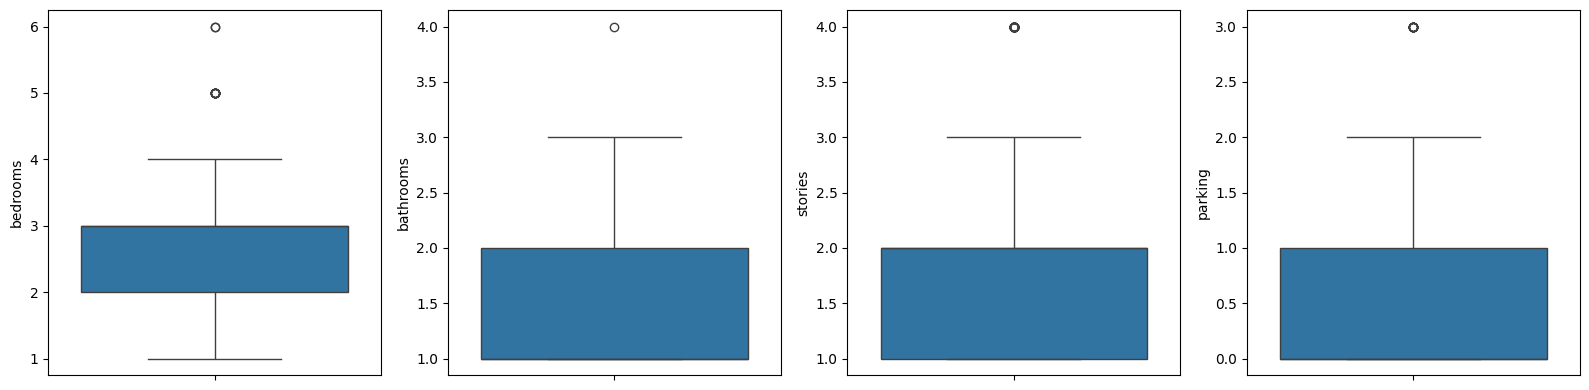

In [17]:
cols = ['bedrooms', 'bathrooms', 'stories','parking']

plt.figure(figsize=(16,4))
for i , col in enumerate(cols):
    plt.subplot(1,4,i+1)
    sns.boxplot(df[col])

plt.tight_layout()
plt.show()

In [18]:
col = ['bedrooms', 'bathrooms', 'stories','parking']

for c in col:
    Q1, Q3 = np.quantile(df[c], [0.25, 0.75])
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    higher_fence = Q3 + 1.5 * IQR
    df = df[(df[c] >= lower_fence) & (df[c] <= higher_fence)]
    

In [19]:
df.shape

(483, 13)

In [20]:
df1 = df.corr()

In [21]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [22]:
corr_features = correlation(df, 0.85)

In [23]:
corr_features

set()

In [24]:
df.drop(corr_features, axis=1, inplace=True)

In [25]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishing_encoded
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,0


In [26]:
X = df.drop('price',axis=1)
y = df['price']

In [27]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train, y_test = train_test_split(X, y , test_size=0.20, random_state=42)

In [28]:
X_train.shape , X_test.shape

((386, 12), (97, 12))

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.56542969,  0.18721534, -0.51932214, ..., -0.76775748,
        -0.53941626,  1.25760702],
       [ 0.73115444,  0.18721534, -0.51932214, ..., -0.76775748,
         1.85385588, -1.44677354],
       [-0.41493331,  0.18721534, -0.51932214, ...,  1.78702172,
        -0.53941626, -0.09458326],
       ...,
       [-0.44966325, -1.35034043, -0.51932214, ..., -0.76775748,
        -0.53941626,  1.25760702],
       [-0.44966325, -1.35034043, -0.51932214, ..., -0.76775748,
        -0.53941626,  1.25760702],
       [ 0.2449354 ,  0.18721534,  1.68351684, ...,  0.50963212,
        -0.53941626, -0.09458326]], shape=(386, 12))

In [30]:
X_test = scaler.transform(X_test)


In [31]:
from  sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

y_pred = regression.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))


0.647243028280592
1303886767956.4097
794659.8037362613


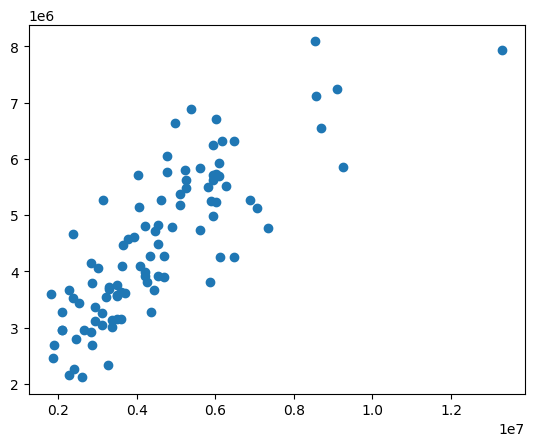

In [33]:
plt.scatter(y_test, y_pred)

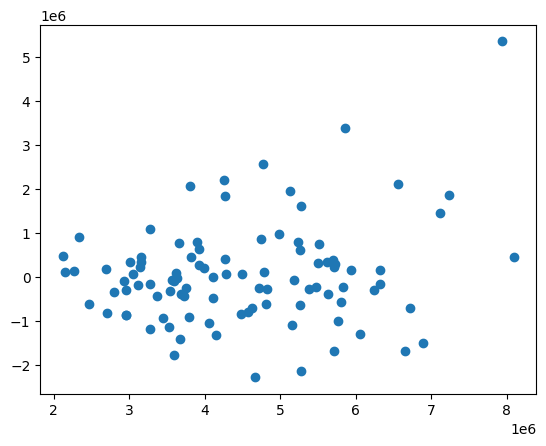

In [34]:
residuals = y_test - y_pred
plt.scatter(y_pred,residuals)

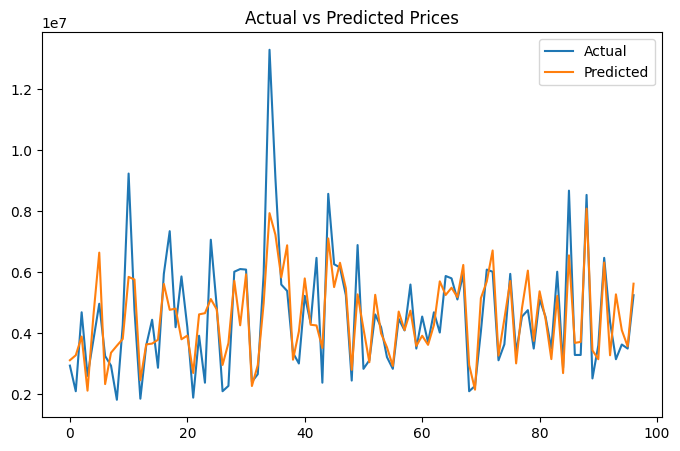

In [35]:
plt.figure(figsize=(8,5))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()